In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
df=pd.read_csv('Housing.csv')

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Length: 545, dtype: bool

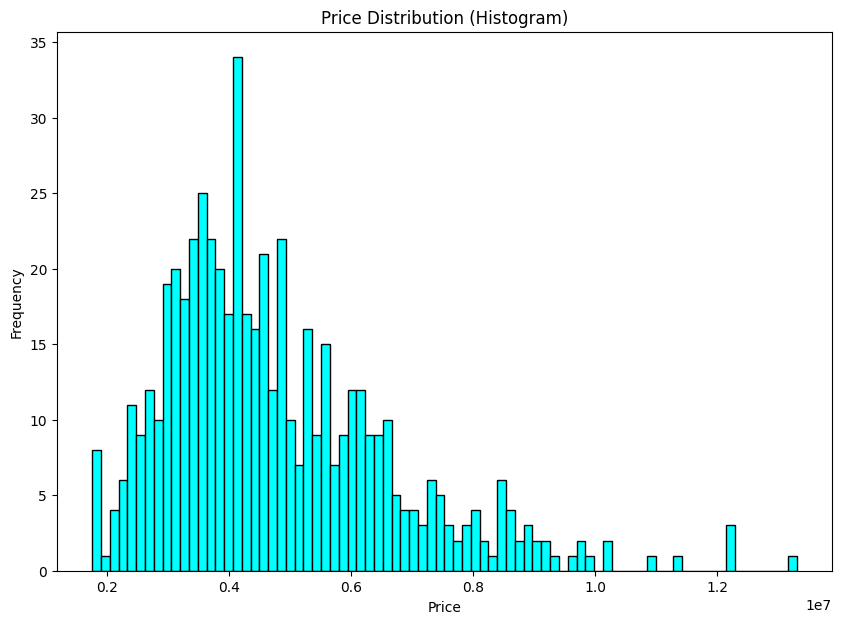

In [12]:
plt.figure(figsize=(10,7))
plt.hist(df['price'], bins=80, edgecolor='black',color='cyan')
plt.title('Price Distribution (Histogram)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [87]:
df['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

## Average price of this data is 4.766729e+06 ##

In [13]:
df['bedrooms'].value_counts()


bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

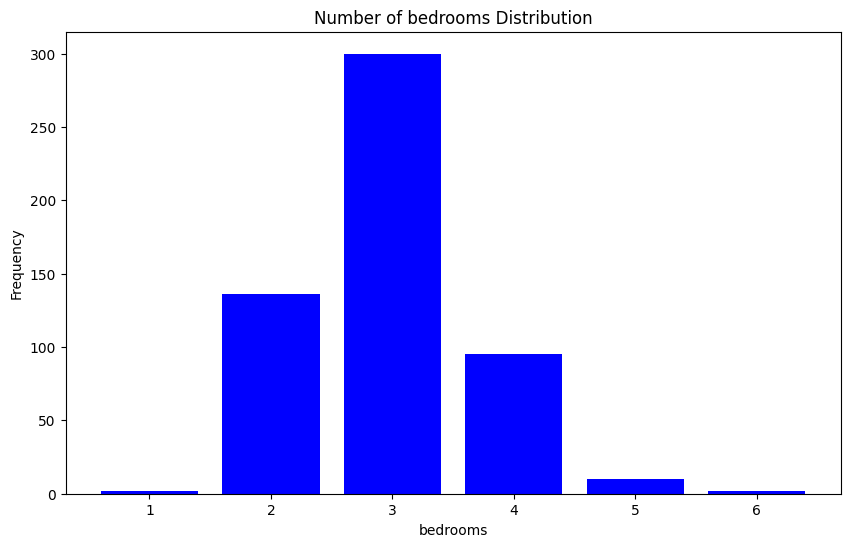

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(df['bedrooms'].value_counts().index, df['bedrooms'].value_counts().values, color='blue')
plt.title('Number of bedrooms Distribution')
plt.xlabel('bedrooms')
plt.ylabel('Frequency')

plt.show() 

## Most Apartments is having 3 Bedrooms ##

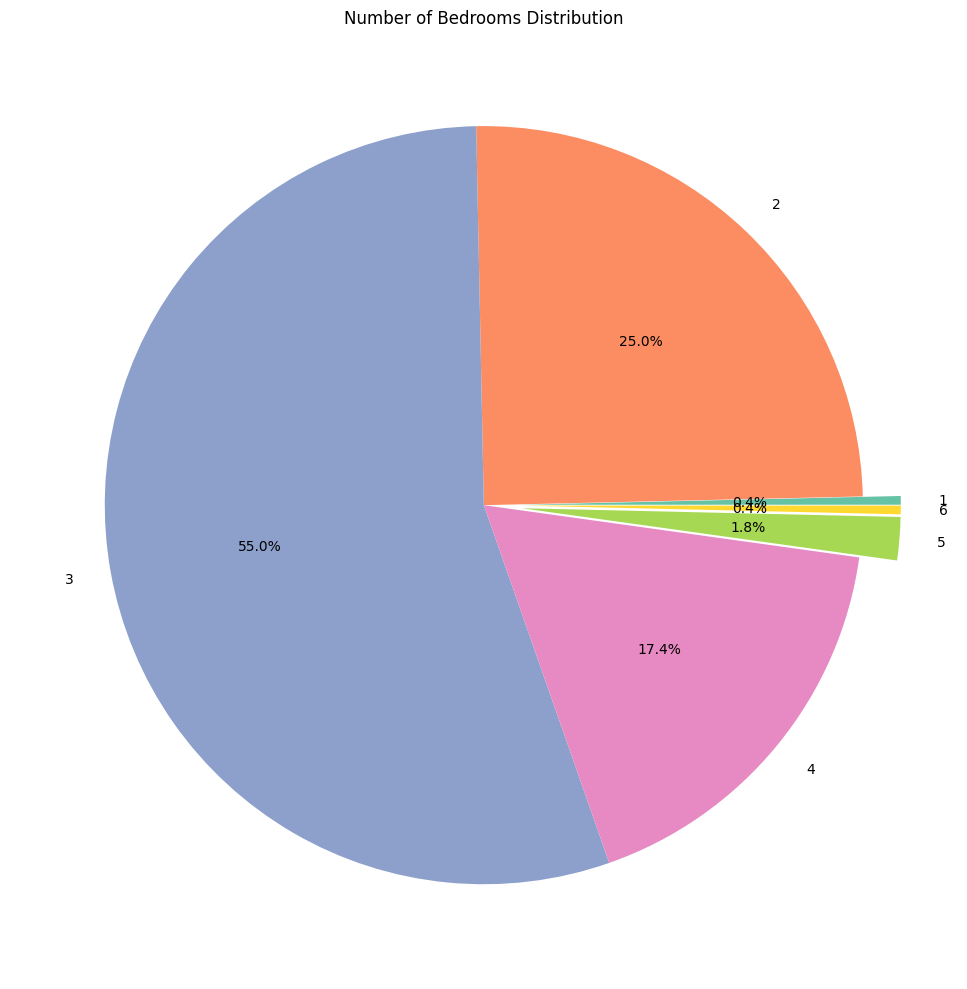

In [25]:
plt.figure(figsize=(10, 10))
plt.pie(df['bedrooms'].value_counts().sort_index(), labels=df['bedrooms'].value_counts().sort_index().index,explode=[0.1,0,0,0,0.1,0.1], autopct='%1.1f%%', colors=plt.cm.Set2.colors)
plt.title('Number of Bedrooms Distribution')
plt.tight_layout()
plt.show()

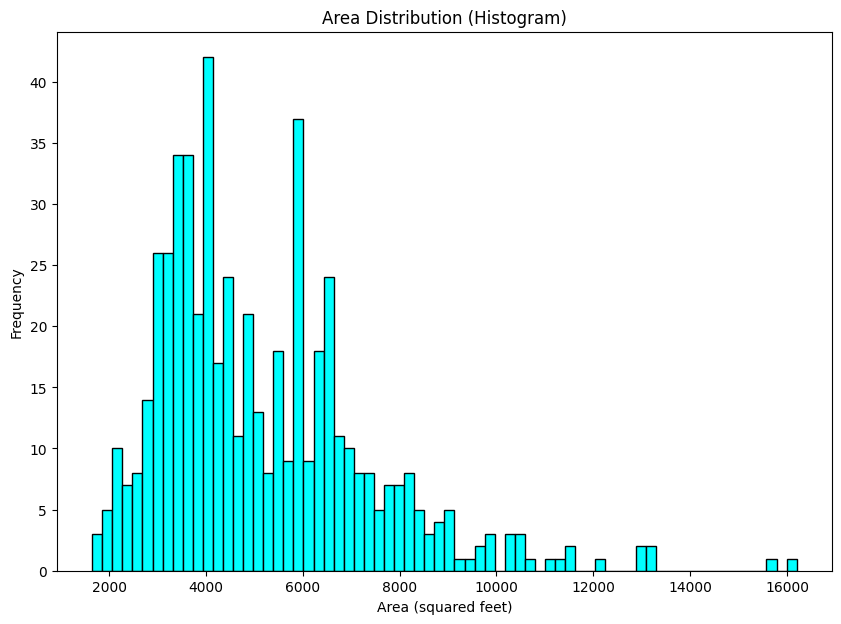

In [30]:
plt.figure(figsize=(10,7))
plt.hist(df['area'], bins=70, edgecolor='black',color='cyan')
plt.title('Area Distribution (Histogram)')
plt.xlabel('Area (squared feet)')
plt.ylabel('Frequency')
plt.show()

In [29]:
df['area'].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

## Average the Area of the Houses is 5150.5 Squared feet ##

## area is measured in squared  feet ##

In [31]:
df['bathrooms'].value_counts()


bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

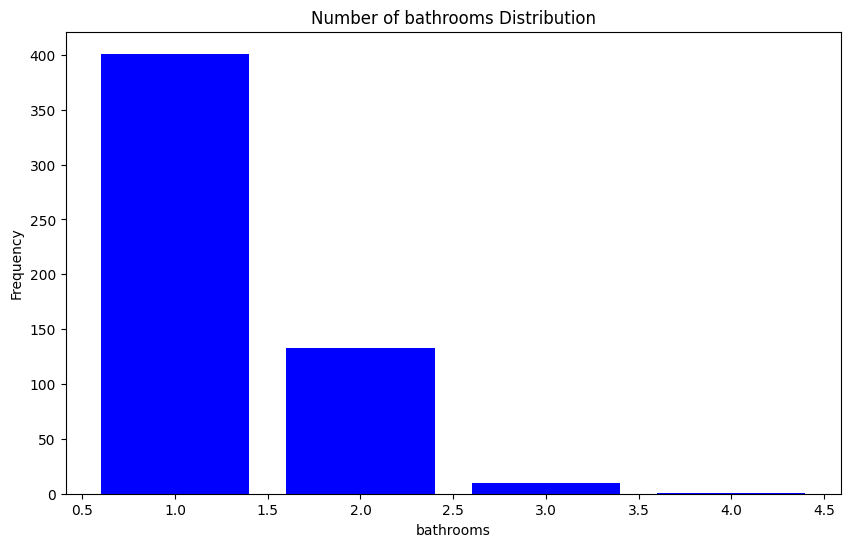

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(df['bathrooms'].value_counts().index, df['bathrooms'].value_counts().values, color='blue')
plt.title('Number of bathrooms Distribution')
plt.xlabel('bathrooms')
plt.ylabel('Frequency')

plt.show() 

## *Most of the Houses Have 1 Bedroom*##

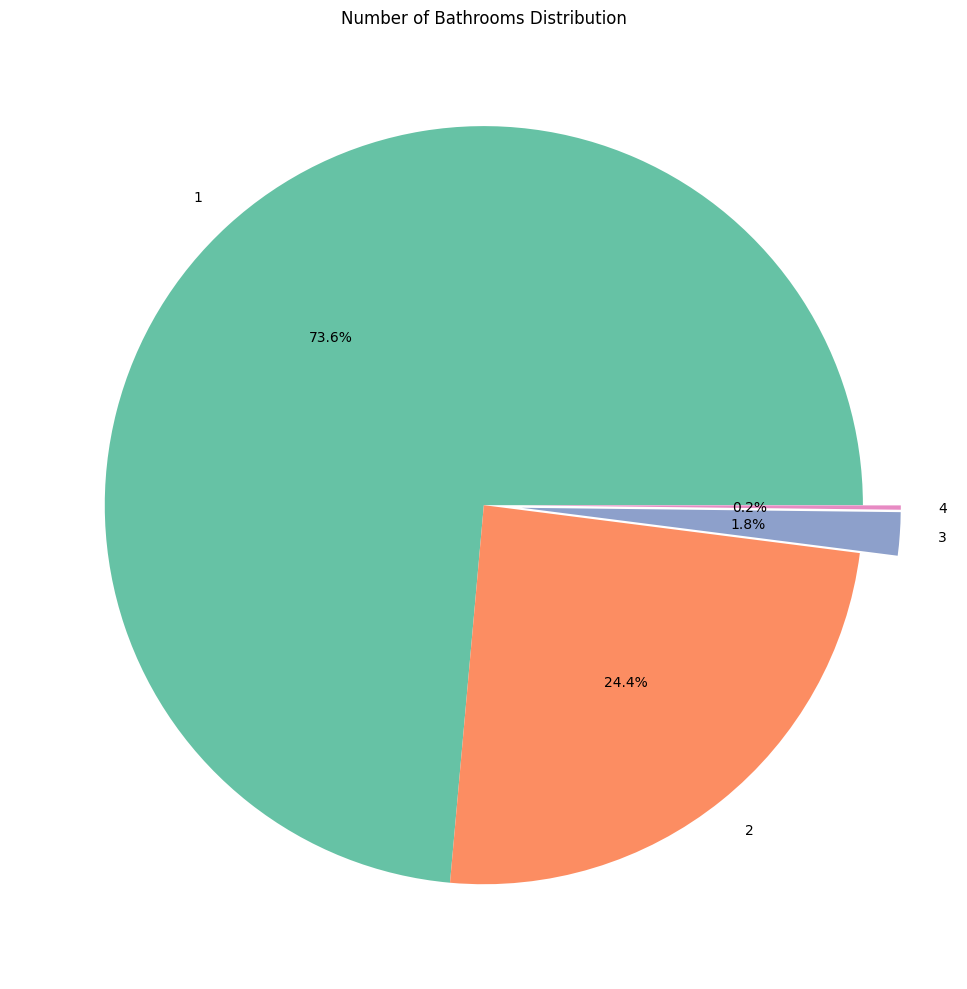

In [37]:
plt.figure(figsize=(10, 10))
plt.pie(df['bathrooms'].value_counts().sort_index(), labels=df['bathrooms'].value_counts().sort_index().index, autopct='%1.1f%%',explode=[0,0,0.1,0.1], colors=plt.cm.Set2.colors)
plt.title('Number of Bathrooms Distribution')
plt.tight_layout()
plt.show()

In [41]:
df.groupby('bedrooms')['price'].mean().sort_values(ascending=False).head()

bedrooms
5    5.819800e+06
4    5.729758e+06
3    4.954598e+06
6    4.791500e+06
2    3.632022e+06
Name: price, dtype: float64

In [42]:
df.groupby('bathrooms')['price'].mean().sort_values(ascending=False).head()

bathrooms
4    1.225000e+07
3    7.282100e+06
2    6.209206e+06
1    4.206913e+06
Name: price, dtype: float64

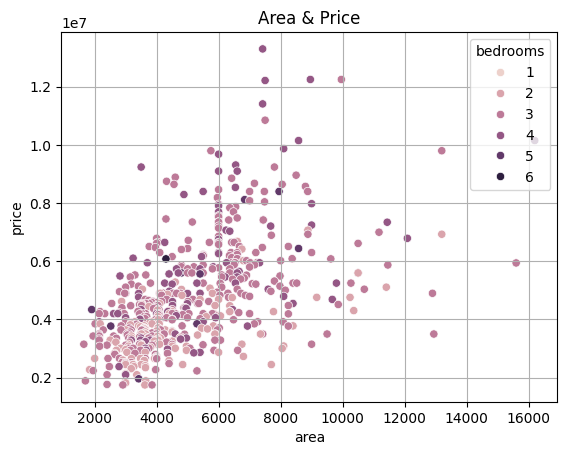

In [54]:
sns.scatterplot(x='area',y='price',data=df,color='blue', hue='bedrooms')
plt.title('Area & Price')
plt.grid(True)
plt.show()

## * Relation between price and area is almost linear  with a few outliers * ##

In [69]:
df.groupby(['stories','bathrooms','bedrooms'])['price'].mean()

stories  bathrooms  bedrooms
1        1          1           2.712500e+06
                    2           3.554459e+06
                    3           4.530194e+06
                    4           3.990000e+06
         2          2           4.047167e+06
                    3           5.928533e+06
                    4           5.284000e+06
                    5           3.773000e+06
         3          3           1.085000e+07
2        1          2           3.840053e+06
                    3           4.128203e+06
                    4           4.706078e+06
                    5           4.996250e+06
                    6           3.500000e+06
         2          2           2.590000e+06
                    3           5.997793e+06
                    4           6.063283e+06
                    5           6.125000e+06
                    6           6.083000e+06
         3          3           5.460000e+06
                    4           6.283667e+06
                    5     

*The Average price of the house compared to the number of stories,bathrooms,bedrooms*

In [84]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [85]:
encoder = LabelEncoder()

df['mainroad'] = encoder.fit_transform(df['mainroad'])
df['guestroom'] = encoder.fit_transform(df['guestroom'])
df['basement'] = encoder.fit_transform(df['basement'])
df['hotwaterheating'] = encoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = encoder.fit_transform(df['airconditioning'])
df['prefarea'] = encoder.fit_transform(df['prefarea'])


In [94]:
df['furnishingstatus'] = encoder.fit_transform(df['furnishingstatus'])

In [95]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [96]:
X = df.drop(columns=['price'])
y = df['price']

In [97]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [91]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

In [99]:
lr = LinearRegression()

lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [100]:
y_pred = lr.predict(X_test)

In [ ]:
print(mean_absolute_error(y_test, y_pred))

979679.6912959905


In [102]:
sgd = SGDRegressor()

sgd.fit(X_train, y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [104]:
y_pred = sgd.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

1725133803939537.0


In [105]:
lasso = Lasso()

lasso.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [106]:
y_pred = lasso.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

979680.730778263


In [107]:
ridge = Ridge()

ridge.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [108]:
y_pred = ridge.predict(X_test)
print(mean_absolute_error(y_test, y_pred))


980105.6394817504
